# **Naive Bayes Model Building**

---



Naive Bayes is a simple yet powerful probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Despite its simplicity, Naive Bayes often performs surprisingly well in a variety of complex real-world applications.

Key Concepts
Bayes' Theorem:

𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
⋅
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)⋅P(A)
​

𝑃
(
𝐴
∣
𝐵
)
P(A∣B) is the posterior probability of class
𝐴
A given predictor
𝐵
B.
𝑃
(
𝐵
∣
𝐴
)
P(B∣A) is the likelihood, which is the probability of predictor
𝐵
B given class
𝐴
A.
𝑃
(
𝐴
)
P(A) is the prior probability of class
𝐴
A.
𝑃
(
𝐵
)
P(B) is the prior probability of predictor
𝐵
B.
Independence Assumption:
The features are assumed to be independent of each other given the class label. This means the presence or absence of a particular feature does not affect the presence or absence of any other feature.

Types of Naive Bayes Classifiers
Gaussian Naive Bayes:
Assumes that the features follow a normal (Gaussian) distribution. It's suitable for continuous data.

Multinomial Naive Bayes:
Used for discrete data, particularly in document classification problems where features represent the frequency of words.

Bernoulli Naive Bayes:
Similar to Multinomial Naive Bayes, but is designed for binary/boolean features (presence or absence of a feature).

Applications
Text Classification: Spam filtering, sentiment analysis, document categorization.
Medical Diagnosis: Classifying diseases based on symptoms.
Recommendation Systems: Predicting user preferences.
Advantages
Efficiency: Computationally efficient with fast training and prediction times.
Simplicity: Easy to understand and implement.
Scalability: Works well with large datasets.
Disadvantages
Independence Assumption: The strong independence assumption rarely holds true in real-world scenarios.
Zero Probability: If a particular feature value never appears in the training data, the model assigns zero probability to that event, which can be problematic.

Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:





In [267]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, porter

In [268]:
os.getcwd()  #can get the path of file if stored in desktop or other location

'/content'

In [269]:
df = pd.read_csv("/content/Stress.csv")

In [270]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [271]:
df.shape

(2838, 7)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [273]:
df.dtypes

subreddit            object
post_id              object
sentence_range       object
text                 object
label                 int64
confidence          float64
social_timestamp      int64
dtype: object

In [274]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [275]:
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [276]:
df.nunique()

subreddit             10
post_id             2343
sentence_range       173
text                2820
label                  2
confidence            10
social_timestamp    2343
dtype: int64

In [277]:
df['label'].unique()

array([1, 0])

In [278]:
df['label'].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

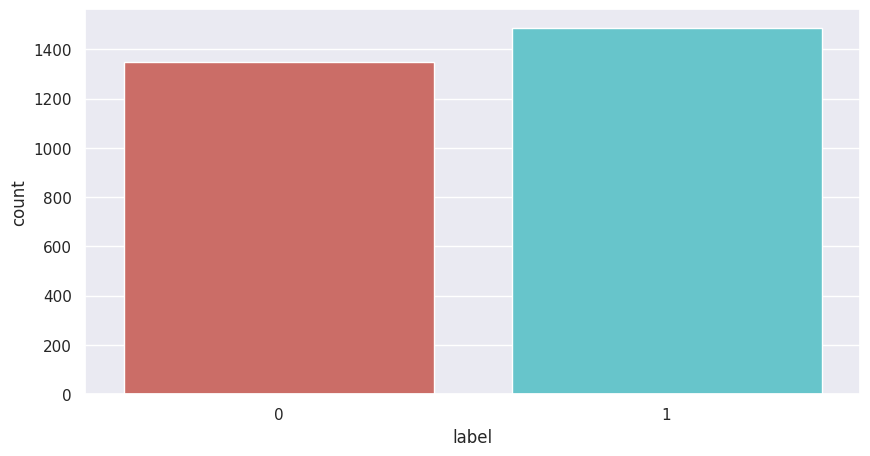

In [279]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'label', data =df, palette = 'hls')
plt.show()

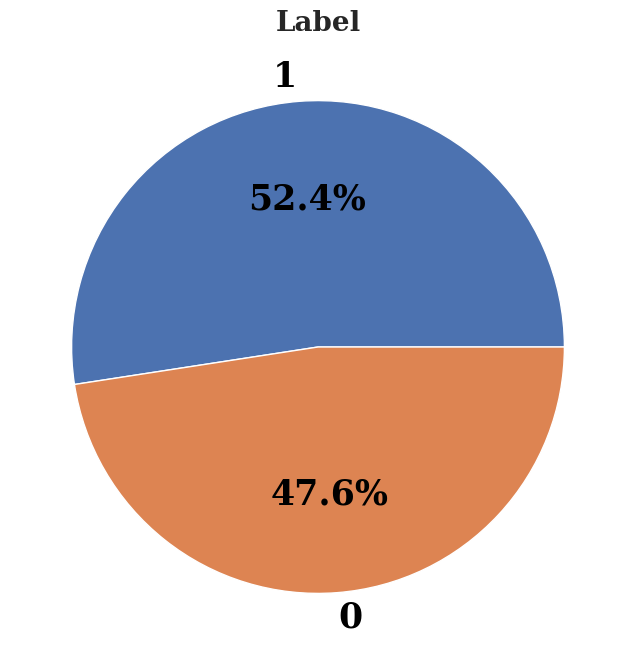

In [280]:
plt.figure(figsize = (15,8))
plt.pie(df['label'].value_counts(), labels = df['label'].value_counts().index, autopct = '%1.1f%%',textprops={'fontsize':25, 'color':'black','weight':'bold',
                                    'family':'serif'})
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('Label', size=20, **hfont)
plt.show()

In [281]:
df['text']

0       He said he had not felt that way before, sugge...
1       Hey there r/assistance, Not sure if this is th...
2       My mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       October is Domestic Violence Awareness Month a...
                              ...                        
2833    * Her, a week ago: Precious, how are you? (I i...
2834    I don't have the ability to cope with it anymo...
2835    In case this is the first time you're reading ...
2836    Do you find this normal? They have a good rela...
2837    I was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [282]:
df['text'][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [283]:
review_0 = df['text'][0]    # returns a pandas Series, which is a one-dimensional array with labeled indices accesses the first element.
print(review_0)
print('*'*500)

review_100 = df['text'][100]
print(review_100)
print('*'*500)

review_1000 = df['text'][1000]
print(review_1000)
print('*'*500)

review_2500 = df['text'][2500]
print(review_2500)
print('*'*500)


He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [284]:
df_new = df.copy()

# **DATA CLEANING**

---



In [285]:
def clean_text(text):
  text = text.lower()
  return text.strip()

In [286]:
df_new['text'] = df_new['text'].apply(lambda x: clean_text(x))

In [287]:
review1_0 = df_new['text'].values[0]   #onverts the entire column text into a NumPy array  returns a scalar (a single value).
print(review1_0)
print('*'*500)

he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi're a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f'n worried about my heart. i do happen to have a physical in 48 hours.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [288]:
df_new.text

0       he said he had not felt that way before, sugge...
1       hey there r/assistance, not sure if this is th...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       october is domestic violence awareness month a...
                              ...                        
2833    * her, a week ago: precious, how are you? (i i...
2834    i don't have the ability to cope with it anymo...
2835    in case this is the first time you're reading ...
2836    do you find this normal? they have a good rela...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

# Remove Punctuations - with String.**punctuation**

---



In [289]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [290]:
def remove_punctuation(text):
  punctuation_free = "".join([i for i in text if i not in string.punctuation])   #dont put space between invertd commas in join it will show space in o/p
  return punctuation_free

In [291]:
df_new['text'] = df_new['text'].apply(lambda x : remove_punctuation(x))

In [292]:
df_new['text']

0       he said he had not felt that way before sugget...
1       hey there rassistance not sure if this is the ...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend he is amazing he ...
4       october is domestic violence awareness month a...
                              ...                        
2833     her a week ago precious how are you i ignored...
2834    i dont have the ability to cope with it anymor...
2835    in case this is the first time youre reading t...
2836    do you find this normal they have a good relat...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

# **TOKENISATION OF WORDS**
The tokenization function splits the input text into tokens by using the re.split method with the pattern \W+.
This pattern matches one or more non-word characters (spaces, punctuation, etc.) and splits the text at these points.
The result is a list of tokens (words) extracted from the input text.

text = "Hello, world! This is a test."
OUTPUT = ['Hello', 'world', 'This', 'is', 'a', 'test', '']

r'\W+': This is the correct regular expression pattern to split the text.

\W: Matches any non-word character.

+: Matches one or more of the preceding pattern.


In [293]:
import re

In [294]:
def tokenization(text):
  tokens = re.split('W+', text)
  return tokens

In [295]:
df_new['text'] = df_new['text'].apply(lambda x: tokenization(x))

In [296]:
df_new['text']

0       [he said he had not felt that way before sugge...
1       [hey there rassistance not sure if this is the...
2       [my mom then hit me with the newspaper and it ...
3       [until i met my new boyfriend he is amazing he...
4       [october is domestic violence awareness month ...
                              ...                        
2833    [ her a week ago precious how are you i ignore...
2834    [i dont have the ability to cope with it anymo...
2835    [in case this is the first time youre reading ...
2836    [do you find this normal they have a good rela...
2837    [i was talking to my mom this morning and she ...
Name: text, Length: 2838, dtype: object

In [297]:
df_new.text[100]

['one of my best friends is getting married in a few months and found the dress shes been waiting for but cant afford it just so happens the boutique she found it at is having a contest to win 1000 towards your dress voting ends tomorrow she was in first but the other girl pulled away into first her name is name here is the way to vote url']

# **Use NLTK AND STOPWORDS FOR TEXT PROCESSING- TO REMOVE STOPWORDS FROM TEXT**

---
nltk is the Natural Language Toolkit library, used for various text processing tasks.
WordCloud is a library used to generate word clouds, which visually represent the frequency of words in a text.

nltk.download('vader_lexicon') downloads the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, which is used for sentiment analysis.
nltk.download('stopwords') downloads the list of stopwords for various languages, including English.

stopwords = nltk.corpus.stopwords.words('english') retrieves the list of English stopwords and assigns it to the variable stopwords.
stopwords (last line) displays the list of stopwords.


In [298]:
import nltk
from wordcloud import WordCloud

In [299]:
nltk.download('vader-lexicon')
nltk.download('stopwords')

[nltk_data] Error loading vader-lexicon: Package 'vader-lexicon' not
[nltk_data]     found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [300]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [301]:
df_new['text']

0       [he said he had not felt that way before sugge...
1       [hey there rassistance not sure if this is the...
2       [my mom then hit me with the newspaper and it ...
3       [until i met my new boyfriend he is amazing he...
4       [october is domestic violence awareness month ...
                              ...                        
2833    [ her a week ago precious how are you i ignore...
2834    [i dont have the ability to cope with it anymo...
2835    [in case this is the first time youre reading ...
2836    [do you find this normal they have a good rela...
2837    [i was talking to my mom this morning and she ...
Name: text, Length: 2838, dtype: object

In [302]:
"""
def remove_stopwords(text_list):
    if isinstance(text_list, list):
        cleaned_text = []
        for text in text_list:
            if isinstance(text, str):
                cleaned_text.append(" ".join(word for word in text.split() if word.lower() not in stopwords))
            else:
                cleaned_text.append(text)  # Keep non-string elements as is
        return cleaned_text
    else:
        return text_list  # Return as is if not a list
        """

'\ndef remove_stopwords(text_list):\n    if isinstance(text_list, list):\n        cleaned_text = []\n        for text in text_list:\n            if isinstance(text, str):\n                cleaned_text.append(" ".join(word for word in text.split() if word.lower() not in stopwords))\n            else:\n                cleaned_text.append(text)  # Keep non-string elements as is\n        return cleaned_text\n    else:\n        return text_list  # Return as is if not a list\n        '

In [303]:

def remove_stopwords(text):
  if isinstance(text, str):  # Ensure text is a string
    output = "".join(word for word in text.split() if word.lower() not in stopwords)
    return output
  else:
        return text  # Return as is if not a string

In [304]:
df_new['text'] = df_new['text'].apply(lambda x: remove_stopwords(x))

In [305]:
df_new['text']

0       [he said he had not felt that way before sugge...
1       [hey there rassistance not sure if this is the...
2       [my mom then hit me with the newspaper and it ...
3       [until i met my new boyfriend he is amazing he...
4       [october is domestic violence awareness month ...
                              ...                        
2833    [ her a week ago precious how are you i ignore...
2834    [i dont have the ability to cope with it anymo...
2835    [in case this is the first time youre reading ...
2836    [do you find this normal they have a good rela...
2837    [i was talking to my mom this morning and she ...
Name: text, Length: 2838, dtype: object

# **Lemmatization**

---



Lemmatization is a text normalization technique used in natural language processing (NLP) and information retrieval to reduce words to their base or root form. Here’s why it’s used and its benefits:

Purpose of Lemmatization
Normalization: Lemmatization helps in standardizing words to their base or root form, which aids in reducing different forms of a word to a common base form. For example, "am", "are", and "is" all reduce to the lemma "be".

Improved Text Analysis: By reducing words to their base forms, lemmatization simplifies text analysis tasks such as text mining, sentiment analysis, and topic modeling. This simplification helps in focusing on the underlying meaning rather than the syntactic variations of words.

Better Feature Extraction: In machine learning tasks where text features are extracted for analysis or classification, using lemmatization ensures that the same underlying meaning is represented consistently, thereby improving model performance.

Benefits of Lemmatization
Semantic Meaning Retention: Unlike stemming, which simply chops off prefixes or suffixes without considering the meaning of the word, lemmatization retains the semantic meaning of words by reducing them to their dictionary form.

Improved Accuracy: Lemmatization helps in improving the accuracy of text analysis tasks because it reduces the vocabulary size and ensures that words with similar meanings are treated alike.

Better Interpretability: Outputs from lemmatization are typically more interpretable because the base forms are more familiar and closer to human language understanding.

When to Use Lemmatization
Applications Requiring Semantic Analysis: Use lemmatization in applications where understanding the semantic meaning of words is crucial, such as in question answering systems, chatbots, and document retrieval.

Text Preprocessing for Machine Learning: Before applying machine learning algorithms to text data, it's beneficial to preprocess the text with lemmatization to ensure consistency and improve model performance.

In summary, lemmatization is used to normalize words to their base forms, aiding in better text analysis, feature extraction, and overall accuracy in natural language processing tasks.

In [306]:
from nltk.stem import WordNetLemmatizer

In [307]:
wordnet_lemmatizer = WordNetLemmatizer()

In [308]:
def lemmatizer(text):
   if isinstance(text, list):
        lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
        return lemm_text
   else:
        return list  # Return as is if not a list

In [309]:
from nltk.stem import WordNetLemmatizer
# Initialize the WordNet Lemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [310]:

# Define the lemmatizer function
def lemmatizer(text):
    if isinstance(text, list):
        lemm_text = []
        for sentence in text:
            lemm_sentence = " ".join([wordnet_lemmatizer.lemmatize(word) for word in sentence.split()])
            lemm_text.append(lemm_sentence)
        return lemm_text
    elif isinstance(text, str):
        return " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    else:
        return text


In [311]:
"""
# Define the lemmatizer function
def lemmatizer(sentence_list):
    lemmatized_sentences = []
    for sentence in sentence_list:
        lemm_sentence = " ".join([wordnet_lemmatizer.lemmatize(word) for word in sentence.split()])
        lemmatized_sentences.append(lemm_sentence)
    return lemmatized_sentences
"""

'\n# Define the lemmatizer function\ndef lemmatizer(sentence_list):\n    lemmatized_sentences = []\n    for sentence in sentence_list:\n        lemm_sentence = " ".join([wordnet_lemmatizer.lemmatize(word) for word in sentence.split()])\n        lemmatized_sentences.append(lemm_sentence)\n    return lemmatized_sentences\n'

In [312]:
df_new['text'] = df_new['text'].apply(lambda x:lemmatizer(x))

In [313]:
df_new['text']

0       [he said he had not felt that way before sugge...
1       [hey there rassistance not sure if this is the...
2       [my mom then hit me with the newspaper and it ...
3       [until i met my new boyfriend he is amazing he...
4       [october is domestic violence awareness month ...
                              ...                        
2833    [her a week ago precious how are you i ignored...
2834    [i dont have the ability to cope with it anymo...
2835    [in case this is the first time youre reading ...
2836    [do you find this normal they have a good rela...
2837    [i wa talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

# **Remove digits**

---



# removing non-alphabetical characters from the text.

In [314]:
import re

def remove_digits(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        return str(text)  # Or any appropriate handling for non-string values
    clean_text = re.sub('[^a-z]+', ' ', text)  # Remove non-alphabetical characters
    return clean_text

df_new['text'] = df_new['text'].apply(lambda x: remove_digits(x))

In [315]:
"""
def remove_digits(text):
  clean_text = re.sub('[^a-z]+', ' ',text)
  return clean_text
"""

"\ndef remove_digits(text):\n  clean_text = re.sub('[^a-z]+', ' ',text)\n  return clean_text\n"

In [316]:
df_new['text'] = df_new['text'].apply(lambda x: remove_digits(x))

In [317]:
df_new['text']

0        he said he had not felt that way before sugge...
1        hey there rassistance not sure if this is the...
2        my mom then hit me with the newspaper and it ...
3        until i met my new boyfriend he is amazing he...
4        october is domestic violence awareness month ...
                              ...                        
2833     her a week ago precious how are you i ignored...
2834     i dont have the ability to cope with it anymo...
2835     in case this is the first time youre reading ...
2836     do you find this normal they have a good rela...
2837     i wa talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

try the same code in all modify by returning list(text), str(text) plz do for all.

In [318]:
df_new

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)",he said he had not felt that way before sugge...,1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)",hey there rassistance not sure if this is the...,0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",my mom then hit me with the newspaper and it ...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]",until i met my new boyfriend he is amazing he...,1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",october is domestic violence awareness month ...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]",her a week ago precious how are you i ignored...,0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",i dont have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",in case this is the first time youre reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",do you find this normal they have a good rela...,0,0.571429,1488938143


In [319]:
df1 = df_new[['text', 'label']]
df1.head()

,text,label
0,he said he had not felt that way before sugge...,1
1,hey there rassistance not sure if this is the...,0
2,my mom then hit me with the newspaper and it ...,1
3,until i met my new boyfriend he is amazing he...,1
4,october is domestic violence awareness month ...,1


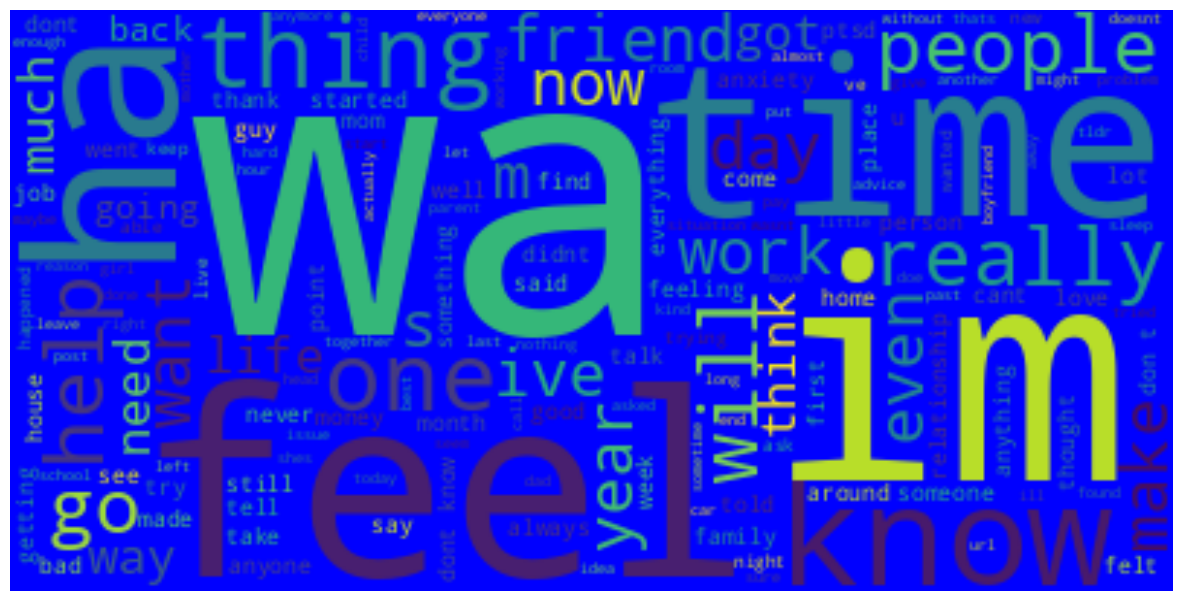

In [320]:
text_data = ' '.join(df1['text'])
wordcloud = WordCloud(background_color = 'blue').generate(text_data)
fix, ax = plt.subplots(figsize = (15,10))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis('off')
plt.show()

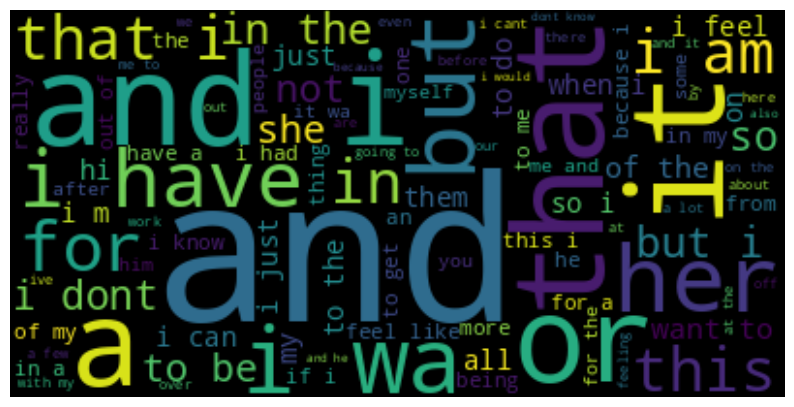

In [321]:
wcloud = WordCloud(max_words =100, background_color = 'black', stopwords= ['go', 'say', 'no', 'well']).generate(text_data)
#wcolud.generate(text_data)
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(wcloud, interpolation = 'bilinear')
ax.axis('off')
plt.show()

In [322]:
# how to combind all the steps together
# feature engineering - BOW, TF-IDF,N-GRAMS,WORD2VEC, GLOVE
# Model building - ML algorithm
# Model building - Llama2 - GenAI

In [323]:
df1.head()

,text,label
0,he said he had not felt that way before sugge...,1
1,hey there rassistance not sure if this is the...,0
2,my mom then hit me with the newspaper and it ...,1
3,until i met my new boyfriend he is amazing he...,1
4,october is domestic violence awareness month ...,1


In [324]:
len(df1)

2838

In [325]:
!pip install contractions

# **TEXT CLEANING APPROACH**

---



In [326]:
from tqdm import tqdm
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re
import nltk   #Natural Language Toolkit, a library for working with human language data.
wordnet = WordNetLemmatizer()  #reduces words to their base or root form.
nltk.download('stopwords')
nltk.download('wordnet') #Download the necessary NLTK resources.
stopwords = nltk.corpus.stopwords.words('english')  #A list of common English stopwords that are often removed in text preprocessing.

preprocessed_reviews = []

for sentence in tqdm(df1['text'].values):  #Used to create progress bars, allowing you to visualize the loop's progress.
  sentence =contractions.fix(sentence) #Expands contractions in the text (e.g., "I'm" to "I am").
  sentence = BeautifulSoup(sentence, 'lxml').get_text()  #Used to parse HTML and XML documents, in this case, to remove HTML tags.
  sentence = re.sub(r"http\S+","", sentence)      #Uses a regular expression to remove URLs from the sentence.
  sentence = re.sub("\S*\d\S*","", sentence).strip()  #Removes any words that contain digits.
  sentence = re.sub('[^a-zA-Z\s]+'," ", sentence)  #Remove non-alphabetic characters:Replaces any character that is not a letter or whitespace with a space.
  tokens = sentence.split()   #Splits the sentence into a list of words (tokens).
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]  #Lemmatizes each word (reducing it to its base form) and removes any stopwords.
  cleaned_sentence = ' '.join(tokens).lower()   #Joins the tokens back into a single string and converts it to lowercase.
  preprocessed_reviews.append(cleaned_sentence.strip())   #Adds the cleaned sentence to the preprocessed_reviews list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 2838/2838 [00:06<00:00, 444.91it/s]


In [327]:
preprocessed_reviews

['said felt way suggeted go rest trigger ahead youire hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloomi fn worried heart happen physical hour',
 'hey rassistance sure right place post go currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current undergradgrad stem student stem student know stem student would greatly appreciate help take pa along short survey thank everyone help take survey entered drawing chance win one three amazon gc',
 'mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided take friend go help another friend move new place driving friend moving strike shoulder address immediately th time told

In [328]:
len(preprocessed_reviews)

2838

# *FEATURE ENGINEERING/EXTRACTION METHOD-CONVERT TEXT TO VECTOR*

---



# TF-IDF

---



In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [330]:
tf_idf_vect = TfidfVectorizer(max_features = 1000)
tf_idf_vect.fit(preprocessed_reviews)
print("Feature Names", tf_idf_vect.get_feature_names_out()[2000:2800])
final_count_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("Count Vectorizer:", type(final_count_tfidf))

Feature Names []
Count Vectorizer: <class 'scipy.sparse._csr.csr_matrix'>


In [331]:
final_count_tfidf.shape

(2838, 1000)

In [332]:
final_count_tfidf = tf_idf_vect.transform(preprocessed_reviews).toarray()


In [333]:
pd.DataFrame(final_count_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072140,0.0,0.0,0.0,0.15017,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.157894,0.0,0.144334,0.0,0.0,0.0,0.0,...,0.0,0.0,0.162691,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [334]:
df1.head()

,text,label
0,he said he had not felt that way before sugge...,1
1,hey there rassistance not sure if this is the...,0
2,my mom then hit me with the newspaper and it ...,1
3,until i met my new boyfriend he is amazing he...,1
4,october is domestic violence awareness month ...,1


split Dependeent and Independnt variable

In [335]:
y = df1['label']     #target(dependent)
x = final_count_tfidf

In [336]:
y.value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

In [337]:
1488*2

2976

# **split training anmd testing data **

---


In [338]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =101)

In [339]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2270, 1000) (568, 1000) (2270,) (568,)


In [340]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(x_train, y_train)

MultinomialNB()

In [341]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

In [342]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [343]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.8136563876651982
**********************************************************************************************************************************
Test Accuracy : 0.7253521126760564


In [344]:
from sklearn.model_selection import cross_val_score
test_result = cross_val_score(gnb, x_test, y_test, cv=10)
print("Max Accuracy :", test_result.max())
print("Mean Accuracy :", test_result.mean())

Max Accuracy : 0.8421052631578947
Mean Accuracy : 0.7058270676691729


In [345]:
print("Training Accuracy\n:", classification_report(y_train, y_pred_train))
print("*"*5)
print("Test Accuracy\n :", classification_report(y_test, y_pred_test))

Training Accuracy
:               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1097
           1       0.79      0.87      0.83      1173

    accuracy                           0.81      2270
   macro avg       0.82      0.81      0.81      2270
weighted avg       0.82      0.81      0.81      2270

*****
Test Accuracy
 :               precision    recall  f1-score   support

           0       0.72      0.63      0.67       253
           1       0.73      0.80      0.76       315

    accuracy                           0.73       568
   macro avg       0.72      0.72      0.72       568
weighted avg       0.72      0.73      0.72       568



In [346]:
import plotly.express as px
import plotly.graph_objects as go

In [347]:
pip install scikit-plot

In [348]:
import scikitplot as skplt

In [349]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [350]:
import scikitplot as skplt

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

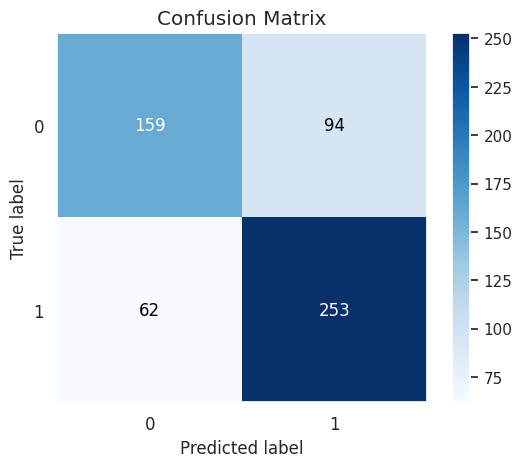

In [351]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

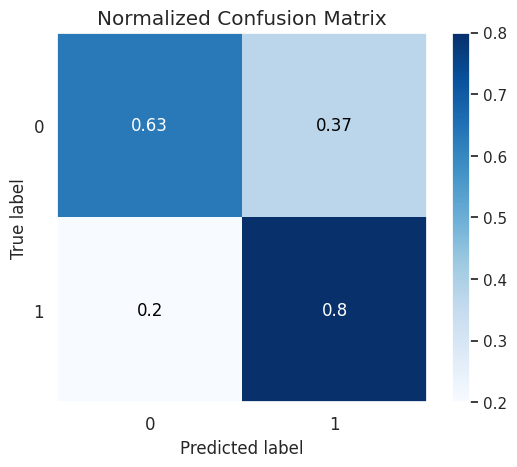

In [352]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize = True)

# **ROC CURVE**

---



ROC Curve (Receiver Operating Characteristic Curve):

Purpose: The ROC curve illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied.

Usage: It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
It helps to understand the trade-off between sensitivity and specificity and aids in selecting the optimal threshold for the classifier.

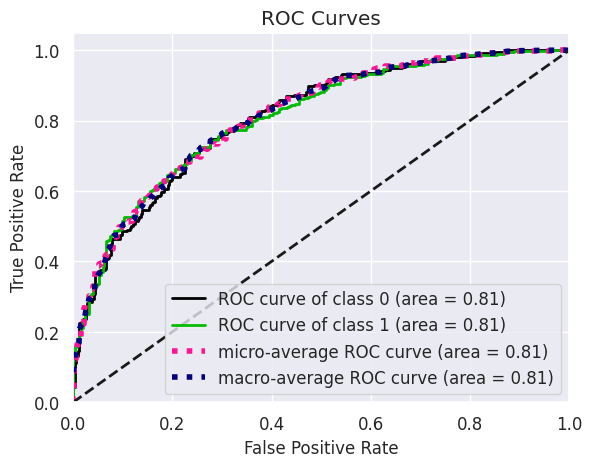

In [353]:
y_probas = gnb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,y_probas)
plt.show()

# **KS Statistic (Kolmogorov-Smirnov Statistic):**

---



Purpose: The KS statistic measures the degree of separation between positive and negative distributions.

Usage: In the context of classification, the KS statistic is often used to evaluate the performance of a binary classifier by examining the separation between the positive and negative distributions of predicted probabilities. It provides a single statistic that summarizes the discriminatory power of the model.


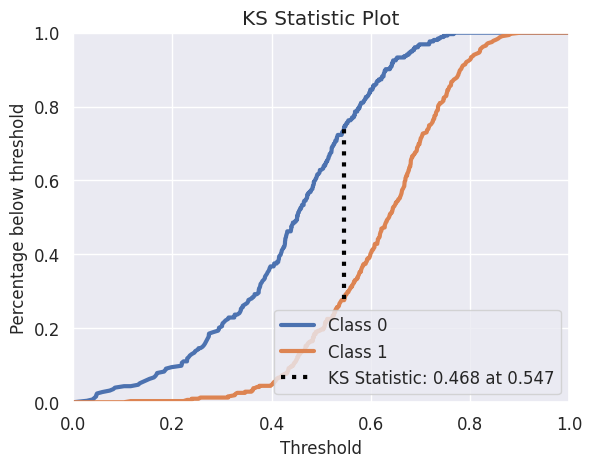

In [354]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

# **Precision-Recall Curve:**

---



Purpose: The precision-recall curve shows the trade-off between precision (positive predictive value) and recall (sensitivity).

Usage: It is particularly useful when dealing with imbalanced datasets where the number of negative examples outweighs the positive examples. The area under the precision-recall curve (AUC-PR) summarizes the model’s ability to correctly classify positive examples.


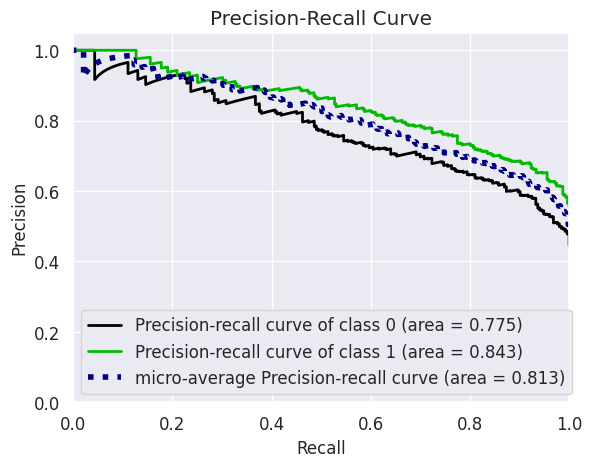

In [355]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

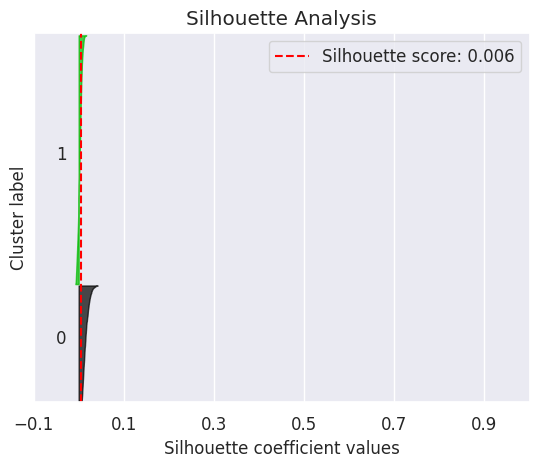

In [356]:
import scikitplot as skplt
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster

kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(x)

skplt.metrics.plot_silhouette(x, cluster_labels)
plt.show()

# **Learning Curve:**

---



Purpose: The learning curve shows the relationship between training set size and model performance.

Usage: It helps to diagnose whether the model suffers from high bias (underfitting) or high variance (overfitting). By plotting the training and cross-validation scores against the number of training examples, you can determine if the model would benefit from more data or if it has already converged.

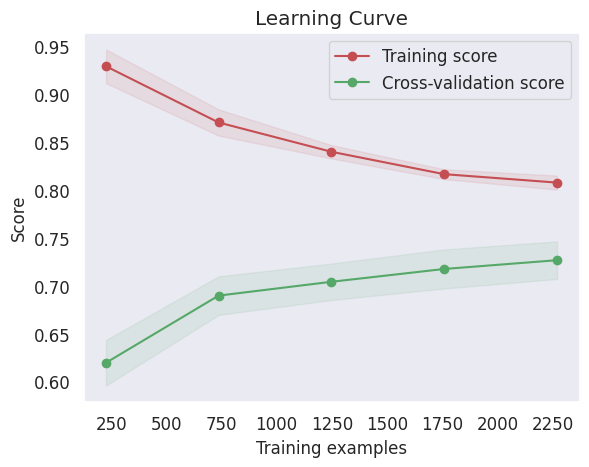

In [357]:
gnb = MultinomialNB()
skplt.estimators.plot_learning_curve(gnb, x, y)
plt.show()

We first analyze the learning curve of the naive Bayes classifier. Its shape can be found in more complex datasets very often: the training score is very high when using few samples for training and decreases when increasing the number of samples, whereas the cv score is very low at the beginning and then increases when adding samples. The training and cv scores become more realistic when all the samples are used for training.

# **Why We Use Them:**

---


Evaluation of Model Performance: These metrics and visualizations provide a comprehensive view of how well the model is performing beyond simple accuracy. They help identify strengths and weaknesses, such as whether the model is biased towards certain classes or if it generalizes well to unseen data.

Threshold Selection: ROC curves and precision-recall curves assist in choosing an optimal classification threshold based on the desired balance between true positives and false positives. This is crucial for applications where different costs are associated with each type of error.

Model Comparison: These tools facilitate comparison between different models by providing standardized metrics (AUC-ROC, AUC-PR, KS statistic) that are independent of class distribution and can be used to objectively assess and rank models.

Diagnostic Insights: Learning curves provide insights into model performance as more data is collected. They reveal whether the model would benefit from additional training data or if improvements in feature engineering or model complexity are necessary.

In summary, these metrics and visualizations collectively provide a nuanced understanding of a model’s performance characteristics, helping practitioners make informed decisions about model selection, tuning, and deployment. Each metric addresses specific aspects of model evaluation, contributing to a more thorough assessment of predictive performance in machine learning tasks.

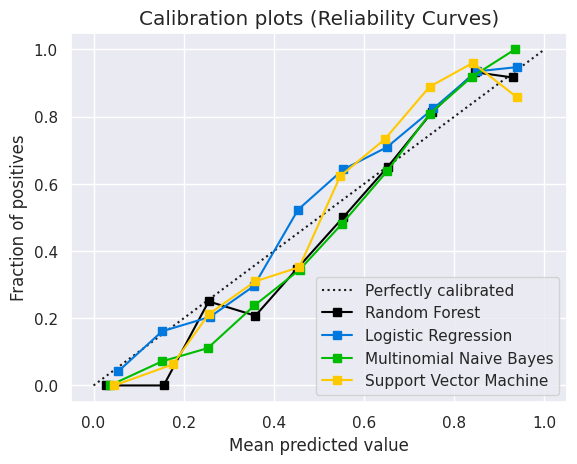

In [358]:
import scikitplot as skplt
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
lr = LogisticRegression()
gnb = MultinomialNB()
svm = LinearSVC()
rf_probas = rf.fit(x_train, y_train).predict_proba(x_test)
lr_probas = lr.fit(x_train, y_train).predict_proba(x_test)
gnb_probas = gnb.fit(x_train, y_train).predict_proba(x_test)
svm_scores = svm.fit(x_train, y_train).decision_function(x_test)
probas_list = [rf_probas, lr_probas, gnb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
              'Multinomial Naive Bayes', 'Support Vector Machine']

skplt.metrics.plot_calibration_curve(y_test,probas_list,clf_names)
plt.show()

In [359]:
# Feature importance
feature_names = tf_idf_vect.get_feature_names_out()
log_prob = gnb.feature_log_prob_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame(log_prob.T, index=feature_names, columns=['Class 0', 'Class 1'])
importance_df['Importance'] = np.abs(importance_df['Class 0'] - importance_df['Class 1'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(importance_df.head(10))

Top 10 Important Features:
              Class 0   Class 1  Importance
survey      -6.003818 -8.566848    2.563030
url         -5.641492 -7.680707    2.039215
link        -6.422370 -8.372298    1.949929
team        -7.069807 -8.786593    1.716786
triggered   -8.685617 -7.085904    1.599713
met         -6.155260 -7.747763    1.592504
participate -7.211048 -8.786593    1.575545
interested  -6.655627 -8.220886    1.565260
terrified   -8.540024 -6.985806    1.554217
sub         -6.754790 -8.226159    1.471369
